# Trevor Taylor
## PHYS 300

# Optimization

Optimization is a method of finding the most optimal conditions of a certain situation. For example you can optimize the distance between atoms to find out when they have the lowest energy levels. Optimization problems are extremely common in physics and this project will compare three different methods. The three methods being Gradient Descent, Conjugate Gradient, and Quasi-Newton Methods.

# Analytic Optimzation

Suppose we have the function

$$f(x) = x^2$$

If we want to find the local minimums of the function, we know from calculous that they potentially exist where 

$$df(x)/dx = 0$$

Using a derivative we get 

$$df(x)/dx = 2x$$

Leading to 

$$x = 0$$

Being a critical point of the function. Using further analysis we see that it is a minimum of the function. 

# Local Minima

However it may not always possible to solve such a function analytically so we use computational methods instead.

Suppose we wish to find the minimum of the function

$$x^4 + x$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as sci
from numba import jit

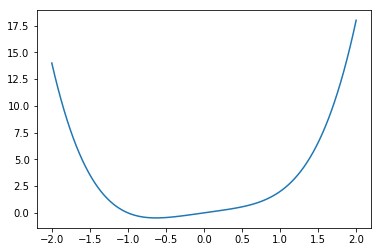

In [4]:
#2D Graph

f = lambda x: x**4 + x

x = np.linspace(-2,2,100)

plt.plot(x,f(x))

# Gradient Descent

To find the minimum of the function above we can make use of the gradient descent method. The intuition of this idea is that we give some initially guess to where the minimum is. From this intial guess we calculate the gradient at that point multipited by a step size a and subtract that from the inital guess to give us our modified position. As we iterate this method we will get more and more precise values of the minimum.

$$x_{n+1} = x_n - adf(x_n)/dx$$

In [13]:
#2D Gradient Descent 

f = lambda x: x**4 + x

def derivative(f,x, dx=0.1):
    return (f(x+dx)-f(x))/dx

def minimize(f, x0, a=0.001, N=10000):
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x0)
    
    for i in range(N):
        x_next = x_now - derivative(f, x_now)*a
        if f(x_next) < f(x_now):
            x_now = x_next
            x_hist.append(x_now)
            #print('New position: x=', x_now)
        else:
            converged = True
            break
    return converged, x_now, f(x_now), np.array(x_hist), i

x0:  2    converged:  True    Best solution: x= -0.6299537094376418 f= -0.4724703935999733 Iterations 1555


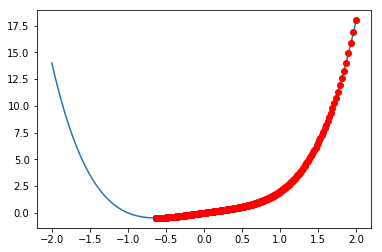

In [14]:
#2D Gradient Descent

x0 = 2

x = np.linspace(-2, 2, 100)

converged, x_best, f_min, x_hist, iterations = minimize(f, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min, 'Iterations', iterations)

plt.plot(x,  f(x))
plt.plot(x_hist, f(x_hist), 'ro')
plt.show()

Notice that the intial guess was not close to the minimum but still found it anyways. This will often be the case except when the method you are using has specific starting conditions or when there are multiple minimia.

Note that this method took many 1000 iterations to get to the approximation it is at now and it still has not converged. This is due to the step size funciton a being very small. However if we make it bigger we may not have small enough divisions to get an accurate root. Ideally we would want the function to take bigger steps when it farther away and for it to take smaller steps when it is closer to the root

# Gradient Descent With Variable Step Size

From the above example we can see that if the step size parameter is very small we tend to take a lot of iterations to converge. However if the step size is too large we may not be able to get the accuracy needed to find the minimum. We need a method that adjusts itself based on how far it is from a minima. 

One way to accomplish this is to use the Barzilai-Borwein method. This gives us a different step size based on the current and previous gradients.

$$ a = \dfrac{(x_n - x_{n-1})^T(\nabla f(x_n)-\nabla f(x_{n-1})}{||\nabla f(x_n) - \nabla f(x_{n-1}||^2}  $$


In [22]:
#2D Gradient Descent with variable step size

f = lambda x: x**4 + x

def derivative(f,x, dx=0.1):
    return (f(x+dx)-f(x))/dx

def minimize2(f, x0, N=1000):
    
    x_now = x0
    converged = False
    x_prev = None
    x_hist = []
    x_hist.append(x0)
    
    for i in range(N):
        if x_prev == None:
            dx =.001
        else:
            dfx = derivative(f, x_now) - derivative(f, x_prev)
            dx = (x_now - x_prev)/dfx
        
        x_next = x_now - derivative(f, x_now)*dx
        
        if f(x_next) < f(x_now):
            x_prev = x_now
            x_now = x_next  
            x_hist.append(x_now)
        else:
            converged = True
            break
    return converged, x_now, f(x_now), np.array(x_hist), i

x0:  2    converged:  True    Best solution: x= -0.5406851309326431 f= -0.4552222151391192 iterations 9


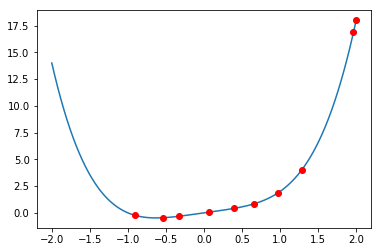

In [23]:
#2D Gradient Descent

x0 = 2

x = np.linspace(-2, 2, 100)

converged, x_best, f_min, x_hist, i = minimize2(f, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min, 'iterations', i)

plt.plot(x,  f(x))
plt.plot(x_hist, f(x_hist), 'ro')
plt.show()

This method got closer to the solution in less steps than the fixed step method did. However depending on the intial guess we may get different x values. This makes this method best used with multiple starting points and finding which one leads to a minimum.

Using Scipy.optimize.minimize we can see that our x value should be -.629. Our variable step calcuation got -.54 in 9 interations for an intial guess of 2 and our fixed step calcuation got -6.299 in 1555 iterations. Therefore both method have advantages and disadvantages however variable step is much faster than fixed step so it is much more applicable.

Note that if we change our intial guess to 1.5 we get a minimum at -.624 which is vastly better.

In [26]:
sci.minimize(f,2,method='BFGS')

      fun: -0.47247039371057686
 hess_inv: array([[0.21016956]])
      jac: array([-3.7252903e-08])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([-0.62996054])

# Gradient Descent with Variable Steps In 3D

This method can easily be exanded to three dimentions. An example of this in three dimentions is

In [27]:
#3D Gradient Descent with variable step size

%matplotlib notebook

def f(x,y):
    return 1/2 * x ** 2 + 1/4 * y ** 2
    
def grad(f,x,y,dx=.01,dy=.01):
    return (f(x+dx,0)-f(x,0))/dx + (f(0,y+dy)-f(0,y))/dy

def minimize(f, x0, y0, N=1000):
    
    y_now = y0
    x_now = x0
    converged = False
    x_prev = None
    y_prev = None
    x_hist = []
    y_hist = []
    x_hist.append(x0)
    y_hist.append(y0)
    
    for i in range(N):
        if x_prev == None and y_prev == None:
            dx = .001
            dy = .001
        else:
            dfy = dfx = (grad(f,x_now,y_now)-grad(f,x_prev,y_now))
            dx = (x_now - x_prev)/dfx
            dy = (y_now - y_prev)/dfy
            
        
        x_next = x_now - grad(f,x_now,y_now)*dx
        y_next = y_now - grad(f,x_now,y_now)*dy

        if f(x_next,y_next) < f(x_now,y_now):
            x_prev = x_now
            x_now = x_next
            y_prev = y_now
            y_now = y_next
            x_hist.append(x_now)
            y_hist.append(y_now)
                
        else:
            converged = True
            break
    return converged, x_now, y_now, f(x_now,y_now), x_hist, y_hist

x0:  2 y0: 1    converged:  True    Best solution: x= 0.33485348632855205  Best solution: y= -0.6651465136715216 f= 0.1666683998155378


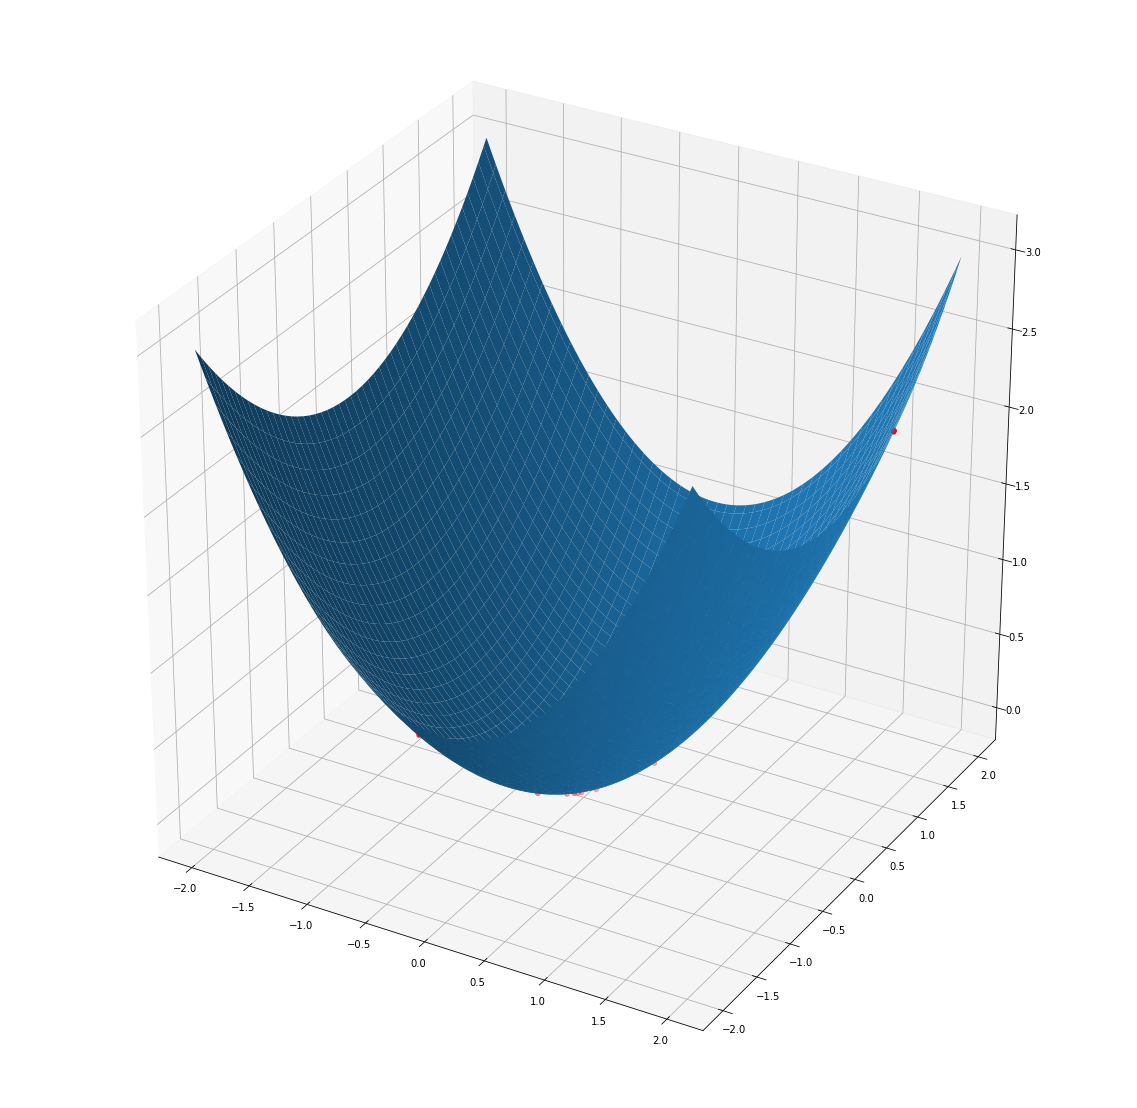

In [32]:
%matplotlib inline

x0 = 2
y0 = 1

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

nx = np.linspace(-2,2,100)
ny = np.linspace(-2,2,100)

converged, x_best, y_best, f_min, x_hist, y_hist = minimize(f, x0, y0)
print('x0: ', x0, 'y0:', y0, '   converged: ', converged, '   Best solution: x=', x_best, ' Best solution: y=', y_best, 'f=', f_min)

x,y = np.meshgrid(nx,ny)

z = f(x, y)

xpow = np.power(x_hist,2)
ypow = np.power(y_hist,2)

z_hist = xpow/2 + ypow/4

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
ax.scatter(x_hist,y_hist,z_hist, c='R')
plt.show()

x0:  2 y0: 1    converged:  True    Best solution: x= 0.33485348632855205  Best solution: y= -0.6651465136715216 f= 0.1666683998155378


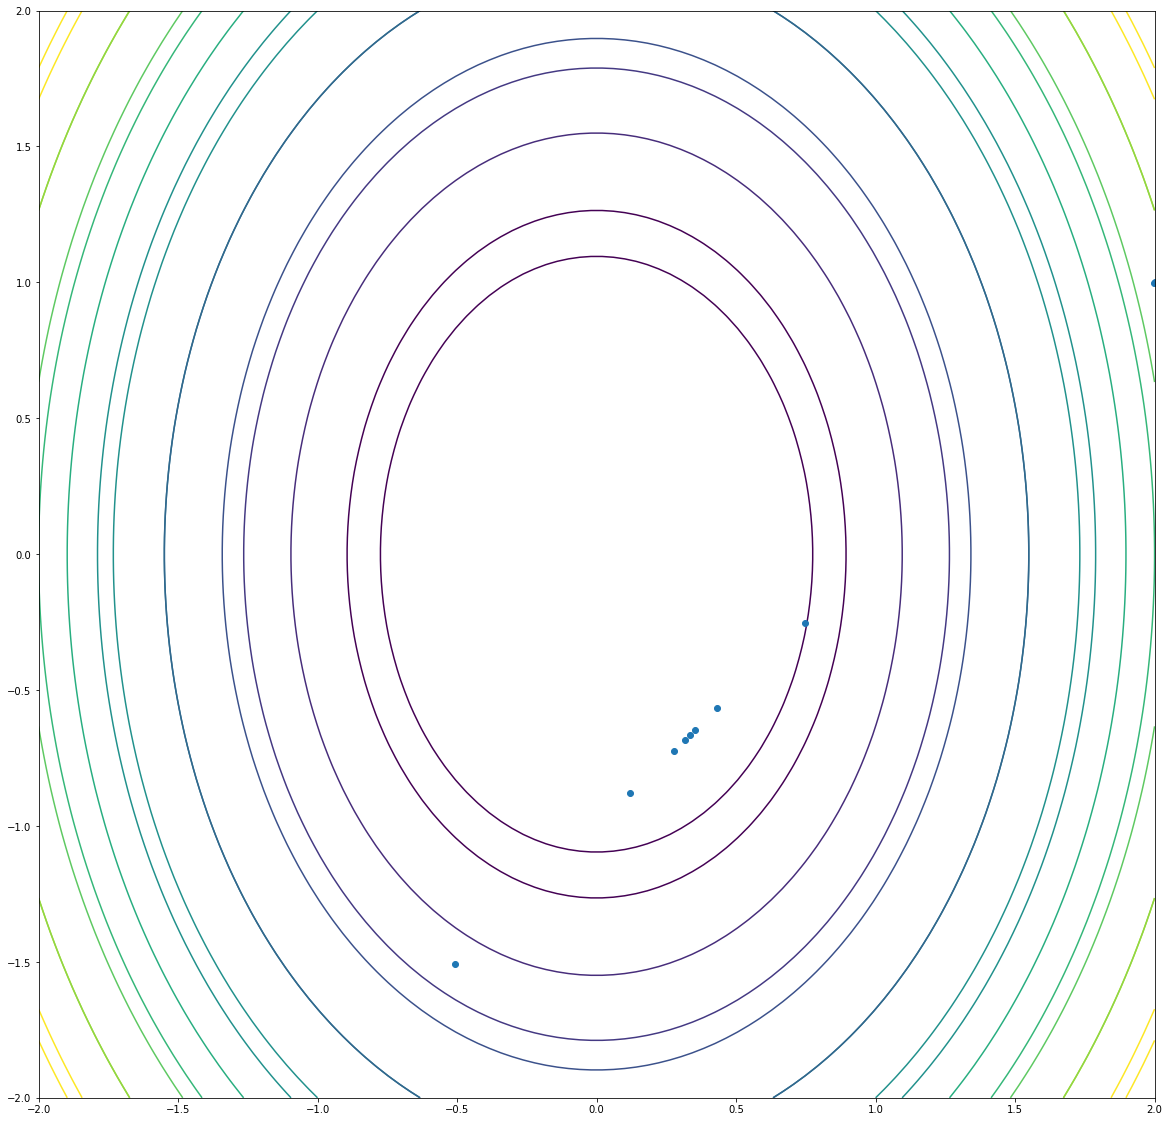

In [35]:
x0 = 2
y0 = 1

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

nx = np.linspace(-2,2,100)
ny = np.linspace(-2,2,100)

converged, x_best, y_best, f_min, x_hist, y_hist = minimize(f, x0, y0)
print('x0: ', x0, 'y0:', y0, '   converged: ', converged, '   Best solution: x=', x_best, ' Best solution: y=', y_best, 'f=', f_min)

x,y = np.meshgrid(nx,ny)

z = f(x, y)

xpow = np.power(x_hist,2)
ypow = np.power(y_hist,2)

z_hist = xpow/2 + ypow/4

levels = np.arange(np.min(z), np.max(z), 0.3)
plt.figure(figsize = (20,20))
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)
plt.plot(x_hist,y_hist,'o')
plt.show()

# Conjugate Gradient

Conjugate Gradient is a method of finding the mimima of a system of linear equations which has a postiviely defined, and symetric matrix defining it. The way conjugate gradient works is that it will first find the minimum in a certain direction. Then from that point it will search in a direction conjugate to the first direction. This allows the conjugate gradient method to solve many systems in n steps for dimetntion R^n

Suppose we have a system of linear equations such as

$$ 8x_1 + x_2 = 1 $$
$$ x_1 + 3x_2 = 3 $$

This can be represented in the form Ax = b

$$ \begin{bmatrix}8 & 1\\1 & 3\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$$

Where the matrix A is positive-definted, real, and symetric

And can be described by the surface

$$ f(x) = \dfrac{1}{2} x^TAx - x^Tb + c $$

The first step to the Conjugate Gradient method is to have an inital guess x0

From that guess we can calculate how far away we are from the minimum by use of the residual

$$ r_n = b - Ax_n $$

We must introduce a new parameter p_n which is the direction that we wish to find a minimum in. At first we will want to search for the minimum based purely on the residual thus p0 is r0. 

The next parameter needed is a0 which is the step length defined by

$$ a_n = \dfrac {r_n^T r_n}{p_n^T A p_n} $$

This allows us to get a new x position

$$ x_{n+1} = x_n + a_np_n $$

And now we can update our residual

$$ r_{n+1} = r_n = a_n A p_n $$

At this point if our r is small enough we are done. If it is not small enough we calculate a new p

$$ p_{n+1} = r_{n+1} - \dfrac{r_{n+1}^T r_{n+1}}{r_n^T r_n}p_n $$

This determines the new search position that is conjugate to the previous search direction.

In [38]:
A = np.array([[4,1],[1,3]])
b = np.array([1,2])
c = 0

x = np.array([3,2])

imax = 10

xvalues = []
yvalues = []

def CG(A,b,x0):
    xvalues.append(x0[0])
    yvalues.append(x0[1])
    r0 = b - np.matmul(A,x0)
    p0 = r0
    converged = False
    
    for i in range(3):
        a0 = np.matmul(r0,r0)/np.matmul(p0,np.matmul(A,p0))
        x1 = x0 + a0 * p0
        r1 = r0 - a0 * np.matmul(A,p0)
        
        xvalues.append(x1[0])
        yvalues.append(x1[1])
        if np.dot(r1,r1)**1/2 > .001:
            beta0 = np.matmul(r1,r1)/np.matmul(r0,r0)
            p1 = r1 + beta0 * p0
            
            p0 = p1
            r0 = r1
            x0 = x1
            #values.append(x0)
        else:
            converged = True
            break
            
    return converged, 'x=', x1, 'iterations=', i+1, 'Ax=', np.matmul(A,x1), 'b=', b

In [39]:
CG(A,b,x)

(True,
 'x=',
 array([0.09090909, 0.63636364]),
 'iterations=',
 2,
 'Ax=',
 array([1., 2.]),
 'b=',
 array([1, 2]))

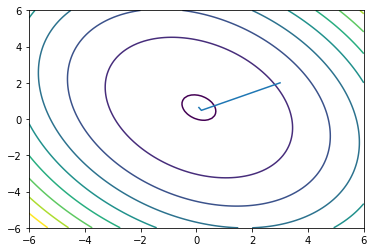

In [40]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

A = np.array([[4,1],[1,3]])
b = np.array([1,2])
c = 0


size = 100

x1 = list(np.linspace(-6, 6, size))
x2 = list(np.linspace(-6, 6, size))
x1, x2 = np.meshgrid(x1, x2)

zs = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        x = np.matrix([[x1[i,j]], [x2[i,j]]])
        zs[i,j] = f(x, A, b, c)

plt.contour(x1, x2, zs, 10)
plt.plot(xvalues,yvalues)
plt.show()

From this we see that the solution was found exactly in only two iterations, making it vastly superior to the other methods

This can also be extended to solve problems in higher dimentions

In [41]:
A = np.array([[4,2,1],[2,5,4.6],[1,4.6,2]])
b = np.array([1,5,2])
c = 0

x = np.array([3,2,4])

imax = 10

xvalues = []
yvalues = []

def CG(A,b,x0):
    xvalues.append(x0[0])
    yvalues.append(x0[1])
    r0 = b - np.matmul(A,x0)
    p0 = r0
    converged = False
    
    for i in range(3):
        a0 = np.matmul(r0,r0)/np.matmul(p0,np.matmul(A,p0))
        x1 = x0 + a0 * p0
        r1 = r0 - a0 * np.matmul(A,p0)
        
        xvalues.append(x1[0])
        yvalues.append(x1[1])
        if np.dot(r1,r1)**1/2 > .001:
            beta0 = np.matmul(r1,r1)/np.matmul(r0,r0)
            p1 = r1 + beta0 * p0
            
            p0 = p1
            r0 = r1
            x0 = x1
            #values.append(x0)
        else:
            converged = True
            break
            
    return converged, 'x=', x1, 'iterations=', i+1, 'Ax=', np.matmul(A,x1), 'b=', b

In [42]:
CG(A,b,x)

(True,
 'x=',
 array([-0.00611621, -0.07135576,  1.16717635]),
 'iterations=',
 3,
 'Ax=',
 array([1., 5., 2.]),
 'b=',
 array([1, 5, 2]))

See that we were able to solve this example in only three iterations and obtain the exact value

# Newton Method

One of the first iterative techniques that depends on the derivative is the Newton method. This method was made to find the zeroes of a function and it comes from the definition of the derivative.

$$ \dfrac{df(x_n)}{dx} = \dfrac{f(x_n)-f(x_{n+1})}{x_n-x_{n+1}} $$

$$ f'(x_n) = \dfrac{f(x_n)-f(n_{n+1})}{x_n-x_{n+1}} $$

$$ f'(x_n)(x_n-x_{n+1}) = f(x_n) - f(x_{n+1}) $$

$$ f'(x_n)(x_n-x_{n+1})-f(x_{n+1}) = f(x_n) $$

$$ let f(x_{n+1}) = 0 $$

$$ x_n-x_{n+1} = \dfrac {f(x_n)}{f'(x_n)} $$

$$ x_{n+1} = x_n - \dfrac {f(x_n)}{f'(x_n)} $$

In [90]:
@jit
def f(x):
    return x**4 + x

@jit
def fprime(x):
    return (4)*x**3 + 1

imax = 1000

@jit
def Newton(x0):

    converged = False
    
    for i in range(imax):
        x1 = x0 - f(x0) / fprime(x0)
        
        #if f(x_next) < f(x_now):
        if f(x0) > f(x1):
            x0 = x1
        
        else:
            converged = True
            break
            
    return converged, x1, i+1

In [91]:
Newton(3)

(True, 0.0, 10)

Remember that this method is not optimizing a function, i.e. finding where the derivative is zero, but instead is finding where the function is equal to zero

# Newtom Method For Optimization

In order to optimize we need to find where

$$ f'(x) = 0 $$

but the Newton method finds where

$$ f(x) = 0 $$ 

However we can make a modification to the newton method to make it work for optimzation

$$ f(x_{n+1}) = f(x_n +x_{n+1}- x_n) $$

let 

$$ x_{n+1}- x_n = \Delta x $$

Then using a Taylor expansion

$$ f(x_{n+1}+\Delta x) \sim f(x_n) + f'(x_n)\Delta x + \dfrac {1}{2} f"(x_n)\Delta x^2 $$

$$ 0 = \dfrac {d}{d\Delta x} f(x_{n+1}+\Delta x) \sim \dfrac {d}{d\Delta x} f(x_n) + f'(x_n)\Delta x + \dfrac {1}{2} f"(x_n)\Delta x^2 = f'(x_n) + f"(x_n)\Delta x $$

$$ 0 = f'(x_n) + f"(x_n)\Delta x $$

$$ \Delta x = \dfrac{-f'(x_n)}{f"(x_n)} $$

$$ x_{n+1} = x_n - \dfrac{f'(x_n)}{f"(x_n)} $$

A learning rate a0 can be introduced to make sure the function reaches the minimum without jumping over the minimum

$$ x_{n+1} = x_n - a_0\dfrac{f'(x_n)}{f"(x_n)} $$

In [13]:
def f(x):
    return x**4 + x

def df(x):
    return 4 * x ** 3 + 1
    
def d2f(x):
    return 12 * x ** 2

imax = 1000

def Newton(x0):
    a0 = .1
    
    converged = False
    
    for i in range(imax):
        x1 = x0 - a0 * df(x0)/d2f(x0)
        
        if f(x0) > f(x1):
            x0 = x1
        
        else:
            converged = True
            break
            
    return converged, x1, i+1

In [16]:
Newton(1)

(True, -0.6299605175889104, 166)

From this we see that the Newton Method works for optimization however there is a problem that quickly arises. In order to do this method for higher dimentions we require the gradients and the gradient squared. (The gradient in higher dimentions is often called the Jacobian matrix and the gradient squared if often called the Hessian)

$$ x_{n+1} = x_n - a_n\dfrac{\nabla f(x_n)}{\nabla ^2 f(x_n)} $$

The Hessian in particular can be extremely hard to calculate as it will have n^n elements for every dimention. Because of this the Hessian is often approximated. This lead to Quasi-Newton Methods

# Quasi-Newton

Quasi Newton methods fix the problem of finding the Hessian Matrix by instead starting with a guess Hessian matrix and approximating it more accurately each iteration. This method ends up being much less costly and is widely used.

The first step in a Quasi Newton method is to find a search direction p that satisfies, where B^-1 is the inverse of the approximate Hessian matrix. If you have no information of the Hessian it is typical to use the Identity matrix instead

$$ p_n = -B_n^{-1} \nabla f(x_n) $$

You now perform a line search in the direction of p_n to get a_n. The you can obtain your new x position

$$ x_{n+1} = x_n + a_np_n $$

Now we need some parameters to update the Hessian matrix

$$ s_n = x_{n+1} - x_n $$

$$ y_n = \nabla f(x_n) - \nabla f(x_{n+1}) $$

We can now use these to compute the Hessian Matrix. However each iteration only depends on the inverse Hessian matrix. So if we do not care about the Hessian matrix at the end we can instead use a formula to directly calculate the inverse Hessian.

$$ B^{-1}_{n+1} = (I - \dfrac{s_ny_n^T}{s_n^Ty_n})B_n(I - \dfrac{y_ns_n^T}{y_n^Ts_n}) + \dfrac{s_ns_n^T}{y_n^Ty_n} $$

From this we now iterate the program until we find a minimum

In [38]:
#There is a problem with this code with regards to the line search function. 
#It should return values for every iteration however often it does not converge after 2 or 3 iterations
#This causes many starting values to not give an accurate ending value
#The point I choose 1,1 allows the program to calculate a0 three times and thus iterate three times
#Luckily the program only needs to iterate three times to get the right answer in this case as we can see
#From the Scipy intergration.
#This also happens for the point (.75,1.25)
#Therefore my code has the potential to find the minimum except when the line search diverges too soon

def f(x):
    return np.exp(x[0]-1) + np.exp(-x[1]+1) + (x[0] - x[1])**2

def df(x):
    return np.array([np.exp(x[0]-1) + 2 * (x[0]-x[1]), - np.exp(1-x[1]) - 2 * (x[0]-x[1])])

def Quasi(x0):
    
    B0 = np.array([[1,0],[0,1]])
    a0 = 1
    converged = False
    
    for i in range(3):
        g0 = df(x0)
        p0 = -1 * np.dot(B0,g0)
        a0 = sci.line_search(f,df,x0,p0)[0]
        x1 = x0 + a0 * p0
        s0 = x1 - x0
        y0 = df(x1) + -1 * df(x0)
        gnorm = np.linalg.norm(g0)
        
        if gnorm > .01:
            U1 = (np.dot(s0,y0) + np.matmul(np.dot(B0,y0),y0))*(np.outer(s0,s0)/np.dot(s0,y0)**2)
            U2 = -1 * (np.matmul(B0,np.outer(y0,s0))+np.matmul(s0,np.dot(y0,B0)))/np.dot(s0,y0)
            B1 = B0 + U1 + U2
            B0 = B1
            x0 = x1
            
            
        else:
            converged = True
            break
        
    
    return converged, 'x1 =',x1, 'iterations =', i+1

In [39]:
Quasi(np.array([.75,1.25]))

(True, 'x1 =', array([0.79611161, 1.20388839]), 'iterations =', 2)

In [40]:
sci.minimize(f,[.75,1.25],method = 'BFGS')

      fun: 1.7973886823533842
 hess_inv: array([[0.60423277, 0.39576727],
       [0.39576727, 0.60423268]])
      jac: array([ 3.63588333e-06, -3.60608101e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([0.79611238, 1.20388759])

Overall Quasi-Newton methods will tend to converge the fastest out of all the methods. However each iteration is more costly than other methods and the operation is more memory intensive due to it having to store a hessian matrix each step. However if you need the Hessian matrix along with the minimum Quasi-Newton methods can provide that when no others can.

# Refrences

“Broyden–Fletcher–Goldfarb–Shanno Algorithm.” Wikipedia, Wikimedia Foundation, 25 Nov. 2018, en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm.

“Quasi-Newton Method.” Wikipedia, Wikimedia Foundation, 11 Sept. 2018, en.wikipedia.org/wiki/Quasi-Newton_method.

https://github.com/scipy/scipy/blob/master/scipy/optimize/optimize.py#L1010

“The Concept of Conjugate Gradient Descent in Python.” Ilya Kuzovkin, ikuz.eu/2015/04/15/the-concept-of-conjugate-gradient-descent-in-python/.